In [1]:
import pandas as pd
from collections import Counter
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score

df = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
df.isnull().values.any()

np.False_

In [3]:
df["Amount"].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [4]:
non_fraud = len(df[df.Class == 0])
fraud = len(df[df.Class == 1])
fraud_percent = (fraud / (fraud + non_fraud)) * 100

print("Number of Genuine transaction: ", non_fraud)
print("Number of Fraud transaction: ", fraud)
print("Percentage of Fraud transaction: {:.4f}".format (fraud_percent))

Number of Genuine transaction:  284315
Number of Fraud transaction:  492
Percentage of Fraud transaction: 0.1727


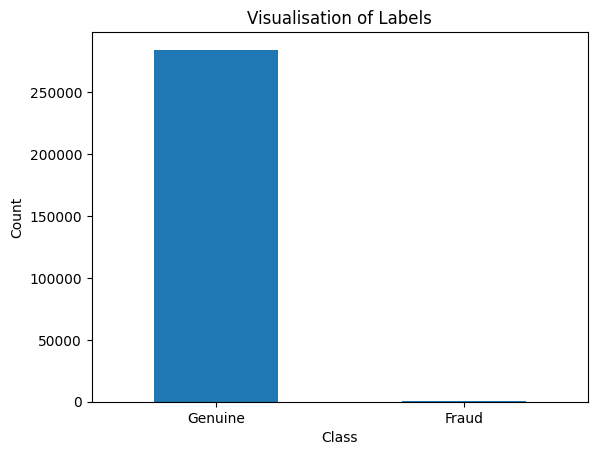

In [5]:
labels = ["Genuine", "Fraud"]
count_classes = df.value_counts(df["Class"], sort= True)
count_classes.plot(kind= "bar", rot= 0)
plt.title("Visualisation of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

In [6]:
scaler = StandardScaler()
df["NormalisedAmount"] = scaler.fit_transform(df["Amount"].values.reshape(-1, 1))
df.drop(["Amount", "Time"], inplace= True, axis= 1)

y = df["Class"]
x = df.drop(["Class"], axis= 1)

In [7]:
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size= 0.3, random_state= 42)

print("Shape of x_train: ", x_train.shape)
print("Shape of x_test: ", x_test.shape)

Shape of x_train:  (199364, 29)
Shape of x_test:  (85443, 29)


In [8]:
#Decision Tree
dtree = DecisionTreeClassifier()

# Random Forest
rf = RandomForestClassifier(n_estimators= 100)

In [9]:
dtree.fit(x_train, y_train)
pred_dt = dtree.predict(x_test)
dt_score = dtree.score(x_test, y_test) * 100

rf.fit(x_train, y_train)
pred_rf = rf.predict(x_test)
rf_score = rf.score(x_test, y_test) * 100

print("Decision Tree score: ", dt_score)
print("Random Forest score: ", rf_score)

Decision Tree score:  99.91807403766254
Random Forest score:  99.96488887328394


In [10]:
def metrics(actuals, predictions):

    print("Accuracy: {:.5f}".format(accuracy_score(actuals, predictions)))
    print("Precision: {:.5f}".format(precision_score(actuals, predictions)))
    print("Recall: {:.5f}".format(recall_score(actuals, predictions)))
    print("F1-score: {:.5f}".format(f1_score(actuals, predictions)))

In [11]:
confusion_matrix_dt = confusion_matrix(y_test, pred_dt.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt)

Confusion Matrix - Decision Tree
[[85261    46]
 [   24   112]]


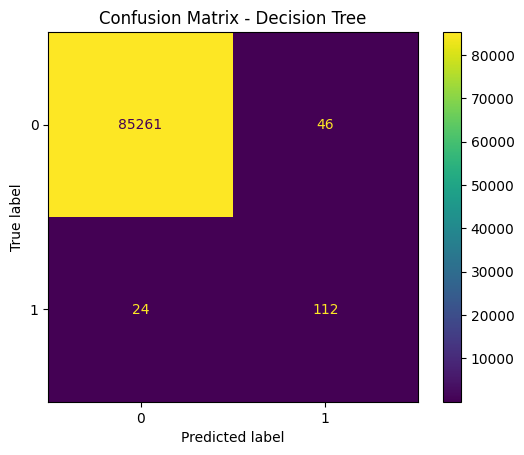

In [12]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix_dt,
    display_labels=[0, 1])

disp.plot() # You can set the colormap here
disp.ax_.set_title("Confusion Matrix - Decision Tree")
plt.show()

In [13]:
print("Evaluation of Decision Tree Model\n")
metrics(y_test, pred_dt.round())

Evaluation of Decision Tree Model



Accuracy: 0.99918


Precision: 0.70886


Recall: 0.82353


F1-score: 0.76190


Confusion Matrix - Random Forest
[[85300     7]
 [   23   113]]


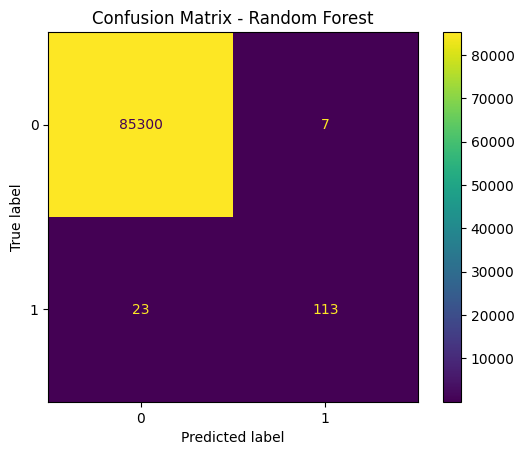

In [14]:
confusion_matrix_rf = confusion_matrix(y_test, pred_rf.round())
print("Confusion Matrix - Random Forest")
print(confusion_matrix_rf)

disp = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix_rf,
    display_labels=[0, 1])
disp.plot() # You can set the colormap here
disp.ax_.set_title("Confusion Matrix - Random Forest")
plt.show()

In [15]:
print("Evaluation of Random Forest\n")
metrics(y_test, pred_rf.round())

Evaluation of Random Forest



Accuracy: 0.99965


Precision: 0.94167


Recall: 0.83088


F1-score: 0.88281


In [16]:
!pip install --upgrade scikit-learn
!pip install --upgrade imbalanced-learn # Only if you are using imbalanced-learn


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/238.4 kB ? eta -:--:--

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 6.4 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [17]:
from imblearn.over_sampling import SMOTE

x_resampled, y_resampled = SMOTE().fit_resample(x, y)
print("Resampled shape of x: ", x_resampled.shape)
print("Resampled shape of y: ", y_resampled.shape)

value_counts = Counter(y_resampled)
print(value_counts)

x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size= 0.3, random_state= 42)

Resampled shape of x:  (568630, 29)
Resampled shape of y:  (568630,)


Counter({0: 284315, 1: 284315})


In [18]:
rf_resampled = RandomForestClassifier(n_estimators= 100)
rf_resampled.fit(x_train, y_train)

pred_resampled = rf_resampled.predict(x_test)
rf_score_resampled = rf_resampled.score(x_test, y_test) * 100

Confusion Matrix - Random Forest after Resampling
[[85130    19]
 [    0 85440]]


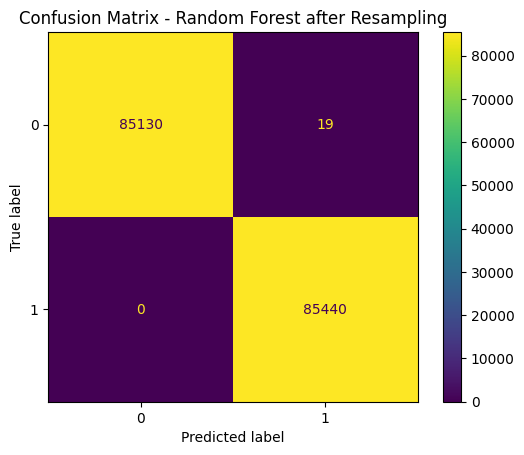

In [19]:
cm_resampled = confusion_matrix(y_test, pred_resampled.round())

print("Confusion Matrix - Random Forest after Resampling")
print(cm_resampled)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm_resampled,
    display_labels=[0, 1])
disp.plot() # You can set the colormap here
disp.ax_.set_title("Confusion Matrix - Random Forest after Resampling")
plt.show()

In [20]:
print("Evaluation of Random Forest after Resampling\n")
metrics(y_test, pred_resampled)

Evaluation of Random Forest after Resampling



Accuracy: 0.99989


Precision: 0.99978


Recall: 1.00000


F1-score: 0.99989
